# Agenda, week 5: Visualization

1. How do we plot? Setting things up, and options
2. Line plots
3. Bar plots
4. Histograms
5. Pie plots
6. Scatter plots
7. Boxplots
8. What next?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
np.random.seed(0)
df = DataFrame(np.random.randint(0, 100, [4, 5]),
              index=list('abcd'),
              columns=list('vwxyz'))

df

,v,w,x,y,z
a,44,47,64,67,67
b,9,83,21,36,87
c,70,88,88,12,58
d,65,39,87,46,88


In [3]:
df.loc['b', 'x'] = np.nan

In [4]:
df.loc['b', 'y'] = np.nan

In [5]:
df.loc['c', 'v'] = np.nan

In [6]:
df.loc['d', 'v'] = np.nan
df.loc['a', 'z'] = np.nan

In [7]:
df

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [8]:
df.dropna()  # this removes any row with *any* NaN values

,v,w,x,y,z


In [9]:
df.dropna(thresh=2)  # drop any column that doesn't have two non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [11]:
df.dropna(thresh=4)  # drop any column that doesn't have four non-NaN values

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
c,NaN,88,88.0,12.0,58.0
d,NaN,39,87.0,46.0,88.0


In [14]:
# this gives me a boolean series, showing me non-NaN values in column 'v'
df['v'].notna()

a     True
b     True
c    False
d    False
Name: v, dtype: bool

In [15]:
# only show the rows in which 'v' doesn't have NaN
df.loc[df['v'].notna()]

,v,w,x,y,z
a,44.0,47,64.0,67.0,NaN
b,9.0,83,NaN,NaN,87.0


# Output from a groupby 



In [17]:
df['category'] = ['food', 'food', 'drink', 'drink']
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [18]:
# for each distinct value of category
# show me the mean value of column 'z'

df.groupby('category')['z'].mean() # here, we get a series back 

category
drink    73.0
food     87.0
Name: z, dtype: float64

In [22]:
g_df = df.groupby('category')[['y', 'z']].mean() # here, we get a data frame back -- one column for x, one for y
g_df

,y,z
category,,
drink,29.0,73.0
food,67.0,87.0


In [23]:
g_df.index

Index(['drink', 'food'], dtype='object', name='category')

In [24]:
df

,v,w,x,y,z,category
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [25]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [26]:
df.index.name = 'surprise'

In [27]:
df

,v,w,x,y,z,category
surprise,,,,,,
a,44.0,47,64.0,67.0,NaN,food
b,9.0,83,NaN,NaN,87.0,food
c,NaN,88,88.0,12.0,58.0,drink
d,NaN,39,87.0,46.0,88.0,drink


In [20]:
# but does a groupby really give us a series or data frame?
# the answer depends on what you consider "groupby returning".

# if you go through the whole thing -- groupby(column)[other_columns].mean() -- then yes, we get
# a series or data frame

# but the return value from groupby is actually a special object

df.groupby('category')

# Visualization

Visualization is a critical part of data analysis, for several reasons:

1. If we have to present our results to non-mathematical types, they'll often appreciate having a visual aid, not just tables of numbers.
2. Guess what? Data analysts are humans, too, and understand visual data faster than mathematical tables, just like everyone else.
3. Because we analysts are humans, we can see a visual form and infer certain things from it, things that we might not notice or understand in a table of numbers. So it's also useful to visualize our data when we're analyzing it, to get a deeper understanding of relationships and values.
4. Often, our analysis will change, or benefit, after we've visualized the data in this way.

# Visualization toolkits and libraries

By far, the biggest and best known visualization library for data in Python is known as "matplotlib." Lots of people use it, because it's so flexible and so powerful.

However, I find it almost impossible to use and understand. 

Fortunately, Pandas comes with methods that invoke matplotlib for us, thus saving us from a lot of the problems associated with it. So we'll be doing visualization via Pandas, which will do the hard matplotlib work for us.

In [28]:
# start with plotting a series

np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
          index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

<AxesSubplot: >

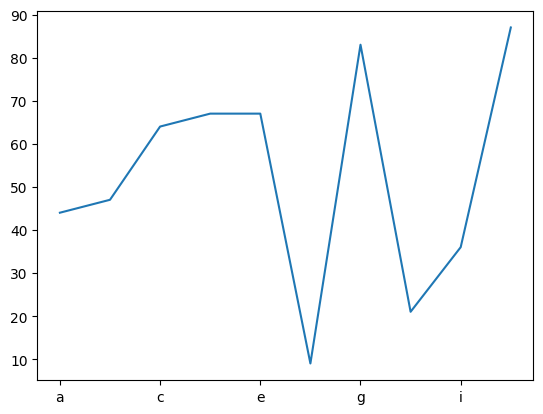

In [29]:
s.plot.line()    # plot is an attribute of our series, and also our gateway to using Matplotlib.

# we can call line() to create a line plot -- each of the values in our series will be plotted
# on the y axis, and the index will be used for the x axis.  

<AxesSubplot: title={'center': 'My amazing plot'}>

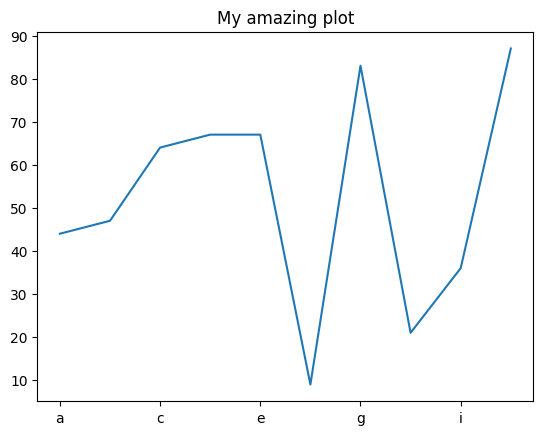

In [30]:
s.plot.line(title='My amazing plot') 

<AxesSubplot: title={'center': 'My amazing plot'}>

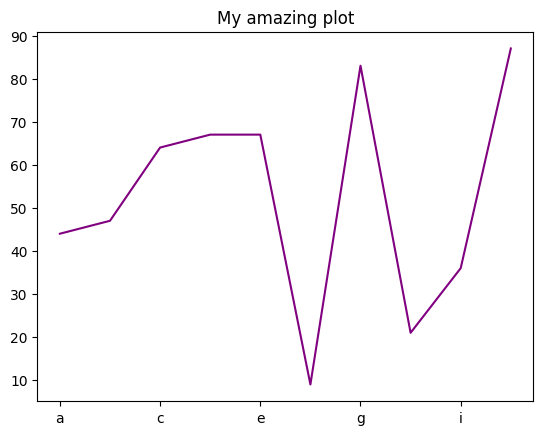

In [31]:
s.plot.line(title='My amazing plot', color='purple') 

<AxesSubplot: title={'center': 'My amazing plot'}>

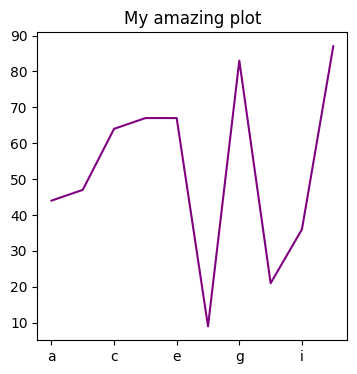

In [33]:
s.plot.line(title='My amazing plot', color='purple',
           figsize=(4,4))   # figsize gets a 2-element tuple with the width and height, in inches, of the plot

In [34]:
np.random.seed(0)

df = DataFrame(np.random.randint(0, 100, [3, 4]),
              index=list('abc'),
              columns=list('wxyz'))

df

,w,x,y,z
a,44,47,64,67
b,67,9,83,21
c,36,87,70,88


<AxesSubplot: >

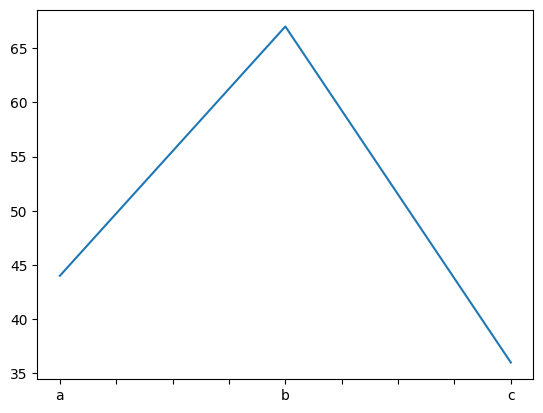

In [35]:
df['w'].plot.line()   # only plot column w

In [36]:
df.sum()

w    147
x    143
y    217
z    176
dtype: int64

<AxesSubplot: >

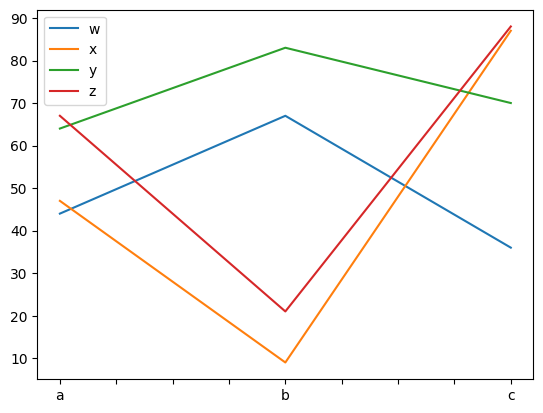

In [37]:
df.plot.line()   # this will plot a line for each of the columns in df

<AxesSubplot: >

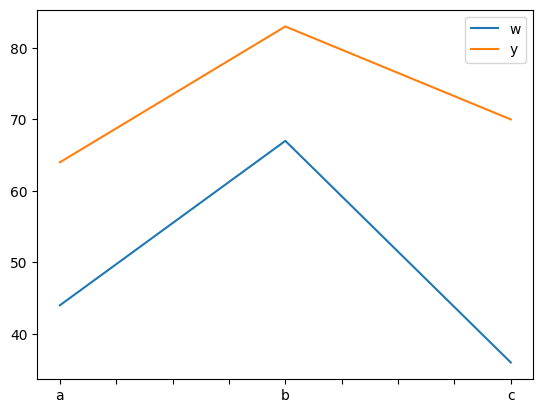

In [38]:
df[['w', 'y']].plot.line()   # this will plot a line for the w and y columns in df

In [40]:
!ls ../data/*,*.csv

../data/albany,ny.csv	    ../data/new+york,ny.csv
../data/boston,ma.csv	    ../data/san+francisco,ca.csv
../data/chicago,il.csv	    ../data/springfield,il.csv
../data/los+angeles,ca.csv  ../data/springfield,ma.csv


# Exercise: High and low temps

1. Load temperature data from Albany, NY (`albany,ny.csv` data file).  We're only interested in the columns for min temp C and max temp C. Make the date column into the index.
2. Plot the min temp on its own.
3. Plot the max temp on its own.
4. Plot both of them together, getting two lines on the same line plot.

In [50]:
df = pd.read_csv('/Users/reuven/Courses/Current/data/albany,ny.csv',
                usecols=[0, 1, 2],
                names=['date', 'maxtemp', 'mintemp'],
                header=0,
                parse_dates=[0],
                index_col='date')
df.head()

,maxtemp,mintemp
date,,
2018-12-11 00:00:00,-2,-8
2018-12-11 03:00:00,-2,-8
2018-12-11 06:00:00,-2,-8
2018-12-11 09:00:00,-2,-8
2018-12-11 12:00:00,-2,-8


In [47]:
df.shape

(728, 2)

<AxesSubplot: xlabel='date'>

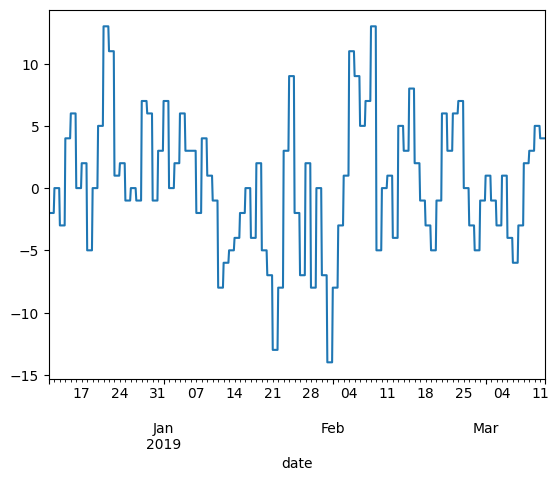

In [51]:
df['maxtemp'].plot.line()

<AxesSubplot: xlabel='date'>

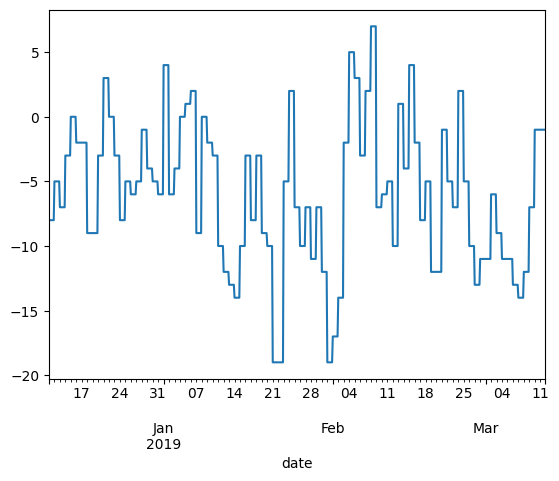

In [52]:
df['mintemp'].plot.line()

<AxesSubplot: xlabel='date'>

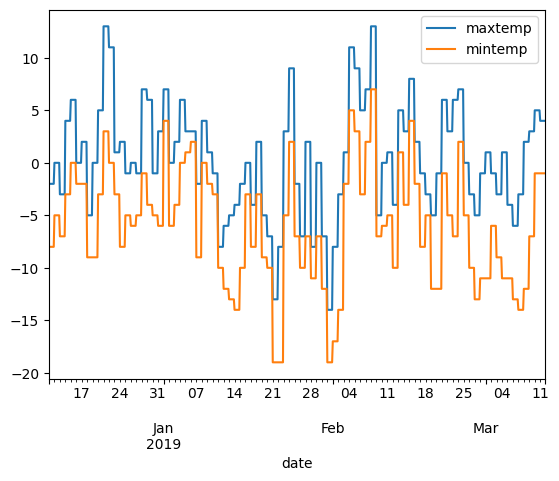

In [53]:
df.plot.line()

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>],
      dtype=object)

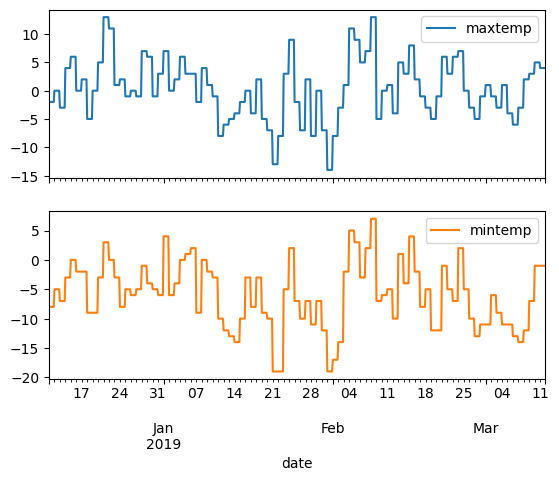

In [54]:
# we can have two separate line plots, one on top of the other, if we want
# them separate but parallel.  For this, we say subplots=True

df.plot.line(subplots=True)

<AxesSubplot: xlabel='date'>

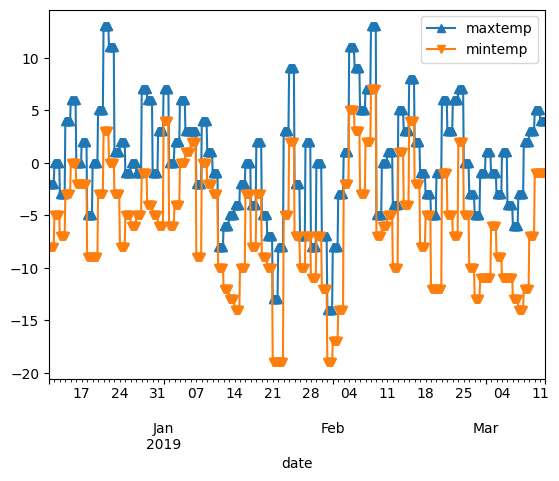

In [66]:
df.plot.line(style=['-^', '-v'])

# Bar plots

In a bar plot, we once again (as in a line plot) will put the index on the x axis. Each data point is drawn as a line (a bar, believe or not!) from the x axis up to the height needed on the y axis, starting from 0.

<AxesSubplot: xlabel='date'>

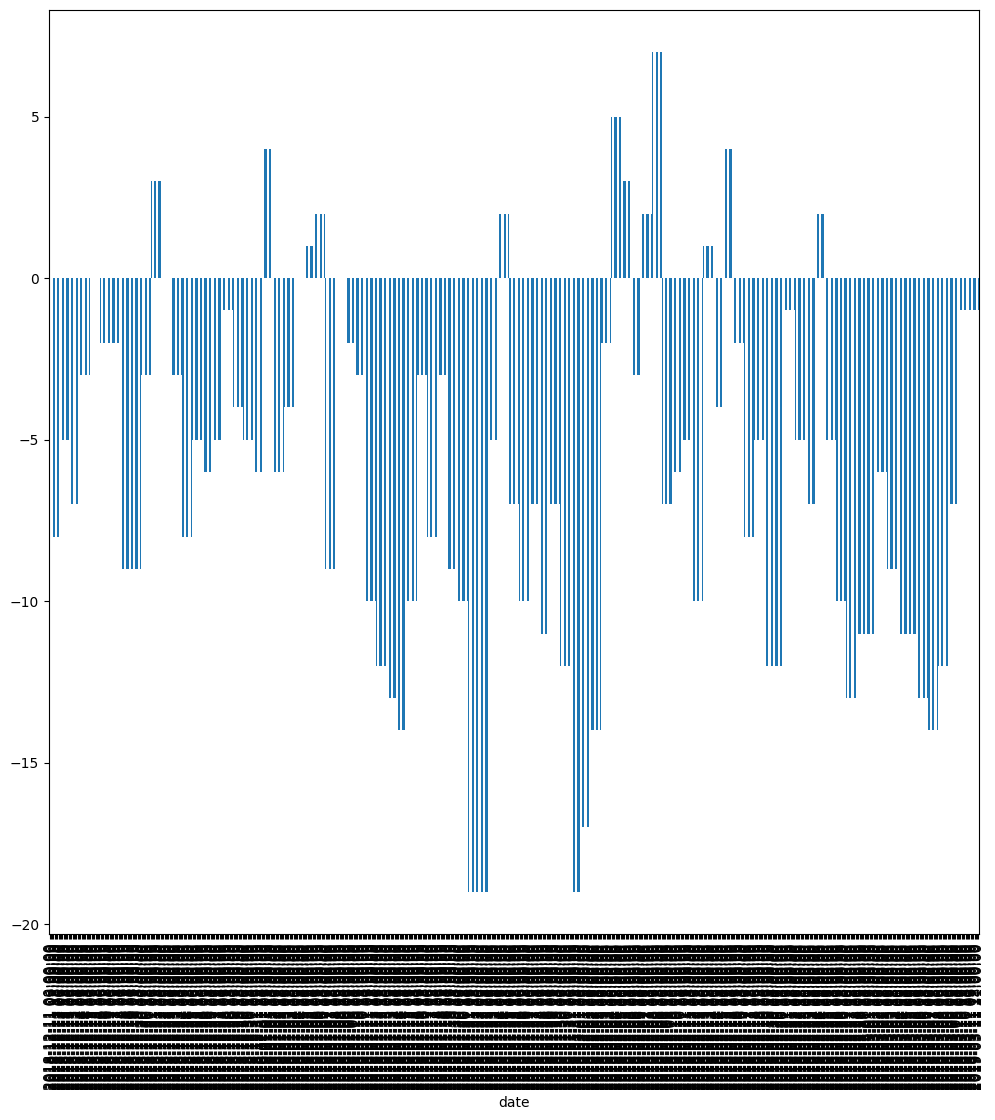

In [69]:
df['mintemp'].plot.bar(figsize=(12,12))

In [68]:
df.shape

(728, 2)

<AxesSubplot: xlabel='date'>

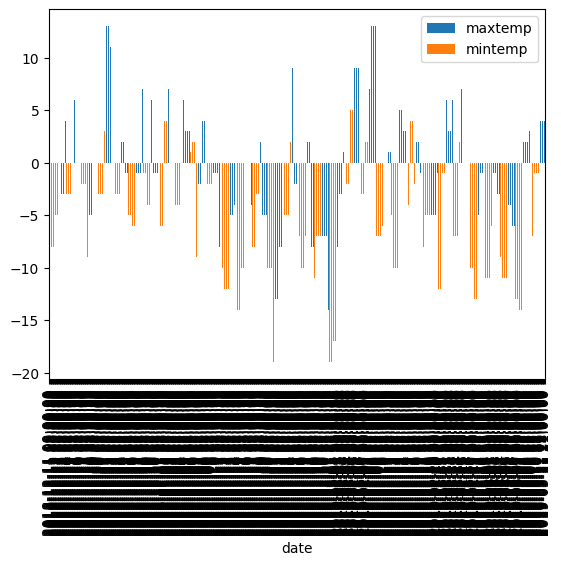

In [70]:
# let's plot the entire data frame, with both columns!

df.plot.bar()

<AxesSubplot: xlabel='date'>

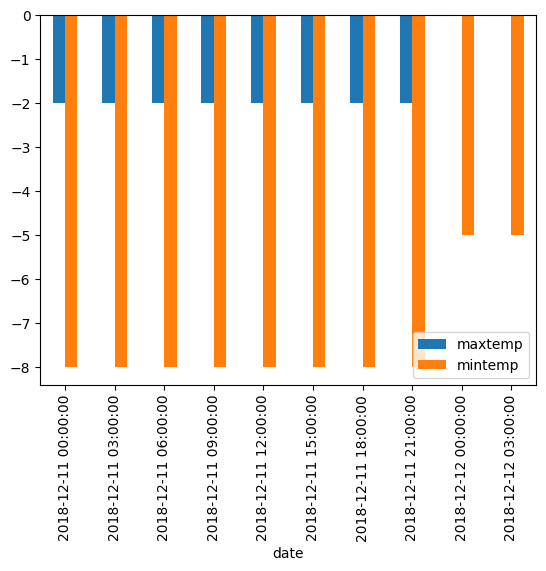

In [71]:
df[:10].plot.bar()

<AxesSubplot: ylabel='date'>

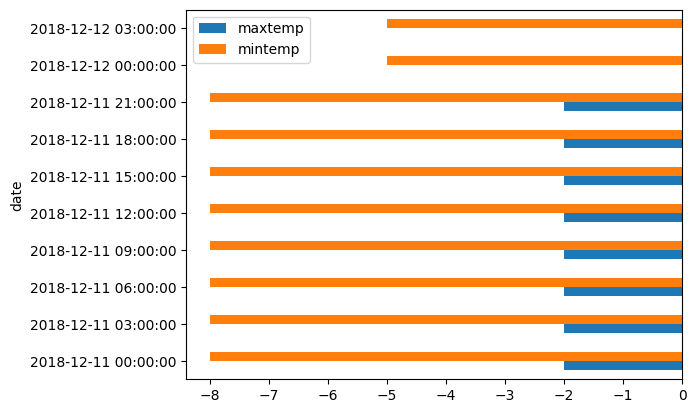

In [72]:
# sometimes, it's helpful to have a horizontal bar plot!

df[:10].plot.barh()

# Exercise: Taxi bar plots

1. Load the NYC taxi data for January 2019 into a data frame.  We'll want the following columns: fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, and `total_amount`.
2. Create a bar plot showing the `total_amount` for the first 50 cab rides in the data set.
3. Create a bar plot showing both `total_amount` and `tolls_amount` for the first 50 cab rides.

In [74]:
filename = '../data/nyc_taxi_2019-01.csv'

df = pd.read_csv(filename,
                usecols=['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'])

In [75]:
df.head()

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,7.0,0.5,0.5,1.65,0.0,0.3,9.95
1,14.0,0.5,0.5,1.00,0.0,0.3,16.30
2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
3,3.5,0.5,0.5,0.00,0.0,0.3,7.55
4,52.0,0.0,0.5,0.00,0.0,0.3,55.55


In [76]:
df.shape

(7667792, 7)

<AxesSubplot: >

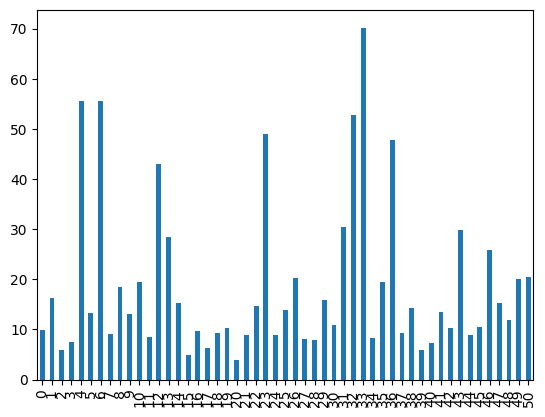

In [81]:
df.loc[:50, 'total_amount'].plot.bar()

<AxesSubplot: >

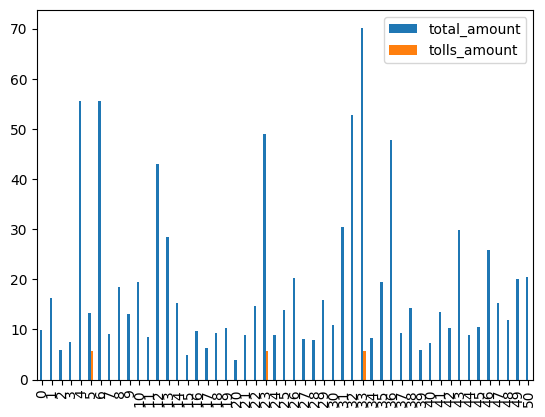

In [82]:
df.loc[:50, ['total_amount', 'tolls_amount']].plot.bar()

<AxesSubplot: >

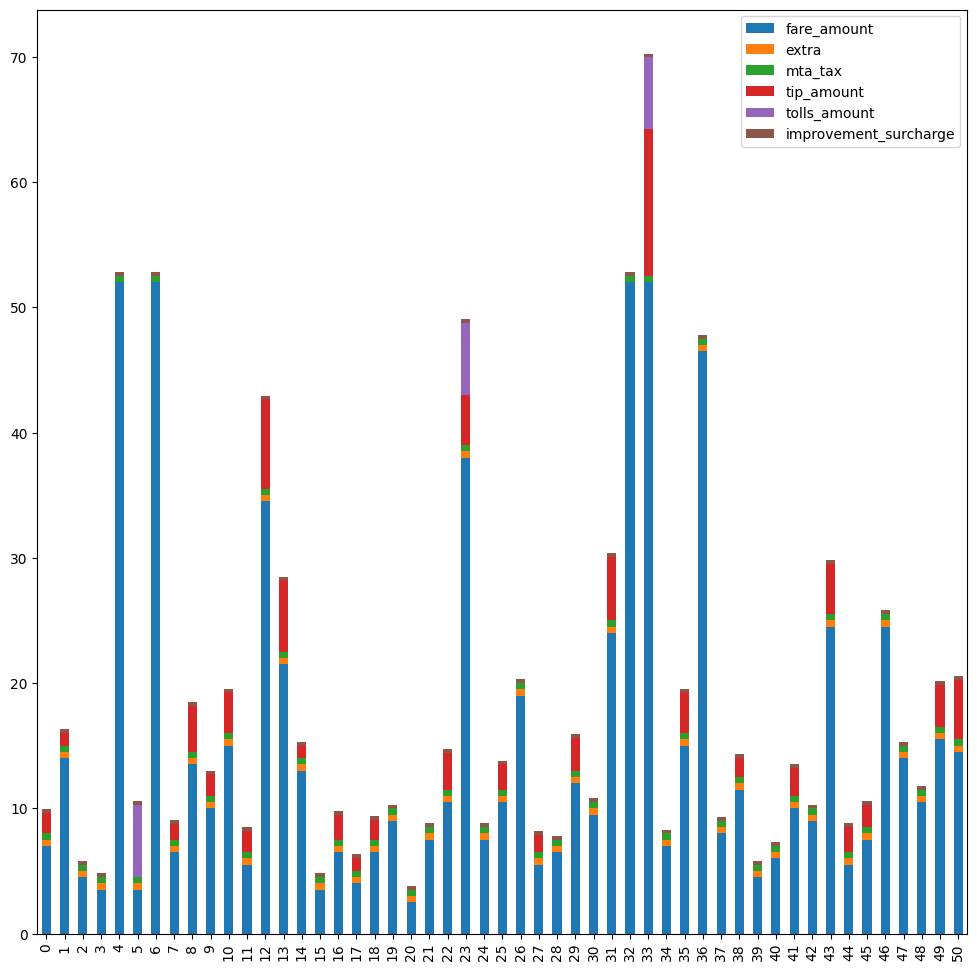

In [87]:
# Pandas bar plots can be "stacked" -- if we're running .plot.bar on a data frame,
# and the data frame has several columns, then we can ask for each of them to be put
# onto the *same* bar, stacked, to see the total amount

# I'm not going to plot total_amount now. Rather, I'll plot all of the other columns,
# and we'll be able to see how much of a contribute to the total amount each of 
# the components plays.

df.loc[:50, ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
             'tolls_amount', 'improvement_surcharge']].plot.bar(stacked=True, figsize=(12,12))

# Next up:

- Histograms
- Pie plots

# Histograms

We're often interested in knowing the *distribution* of values. That is: How often did we get a 10? How often 20? How often 25? How often 100? And so on.

In a histogram, we take all of the values from a given column, and we put each value into one of 10 bins. If our values are (roughly) from 0-100, then the first bin will be 0-10, the second 11-20, etc.  Each bin's bar will grow to represent how many times a value in that bin appeared.

What we're basically doing is getting a visual version of the `value_counts` method -- but rather than counting individual values, we're counting groups of values.

In [90]:
s = Series([10, 11, 12, 10, 11, 12, 30, 35, 33, 50, 52, 51, 55, 54, 55, 54, 60, 61, 99])

<AxesSubplot: ylabel='Frequency'>

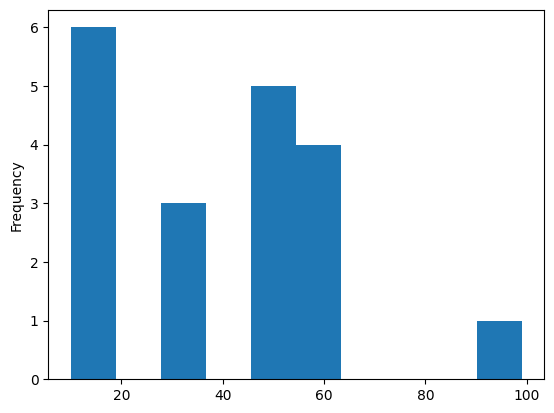

In [91]:
s.plot.hist()  # create a histogram from our series

<AxesSubplot: ylabel='Frequency'>

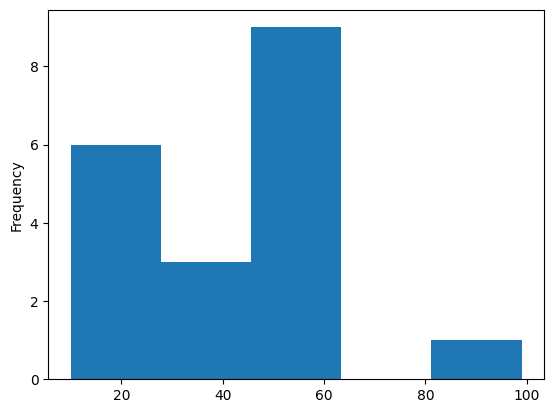

In [92]:
# what if we don't want the default number of bins, which is 10?
# then we can set bins= another number

s.plot.hist(bins=5)

<AxesSubplot: ylabel='Frequency'>

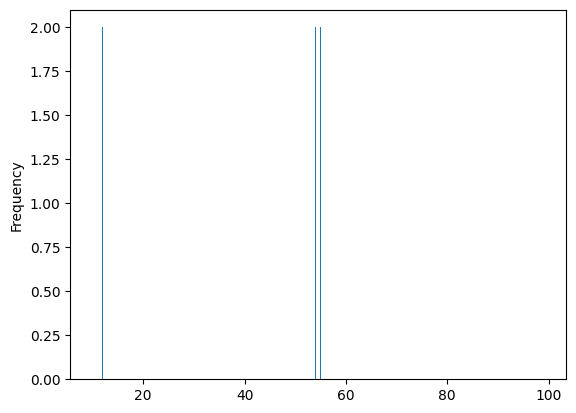

In [94]:
s.plot.hist(bins=1000)